<a href="https://colab.research.google.com/github/youcine/Prodigy_infoTech_internship/blob/main/task_2_prodigy_infoTech_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing Data and neccesery liberies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Uploding Data**

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Prodigy infoTech internship/task 2 /test.csv')
train_df = pd.read_csv('/content/drive/MyDrive/Prodigy infoTech internship/task 2 /train.csv')

test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Merging Datasets into one DataFrame

In [ ]:
# Add a 'Survived' column to the test dataset and fill it with a placeholder value
test_df['Survived'] = -1

df = pd.concat([train_df, test_df], ignore_index=True)


**Exploring Data**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,-0.058060,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.760044,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,-1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,-1.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
df.nunique()

PassengerId    1309
Survived          3
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

# **Data cleaning**

**Missing values**

In [ ]:
df.isna()
print(df)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305        -1       3   
1305         1306        -1       1   
1306         1307        -1       3   
1307         1308        -1       3   
1308         1309        -1       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [ ]:
(df.isna()).value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       773
                                                                                 False  False       270
                                             True   False  False  False   False  True   False       240
                                                                                 False  False        23
                                             False  False  False  False   False  False  True          2
                                                                          True   True   False         1
dtype: int64

In [ ]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df.shape

(1309, 12)

**Dealing with Missing values **

In [ ]:
#calculate the median age for each 'Pclass' and 'Sex' group
median_age_per_group = df.groupby(['Pclass', 'Sex'])['Age'].median()

#use the transform method to fill missing values with the corresponding median age
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))


print(df.isnull().sum())
#i don't need Cabin nb in my analysis so i just leave it

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


**Duplicates value**

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

In [ ]:
print(df.duplicated().sum())

0


# **Exploratory Data Analysis (EDA)**

**Calculate and visualize the survival rate**

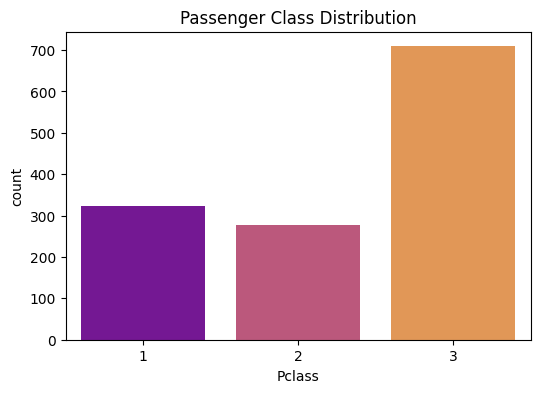

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass',palette='plasma', data=df)
plt.title('Passenger Class Distribution')
plt.show()

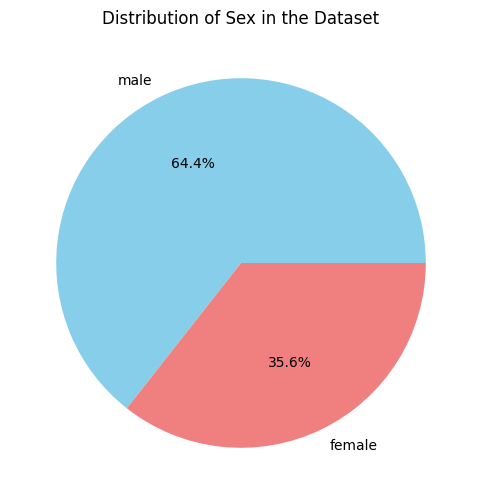

In [ ]:
sex_counts = df['Sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Sex in the Dataset')
plt.show()

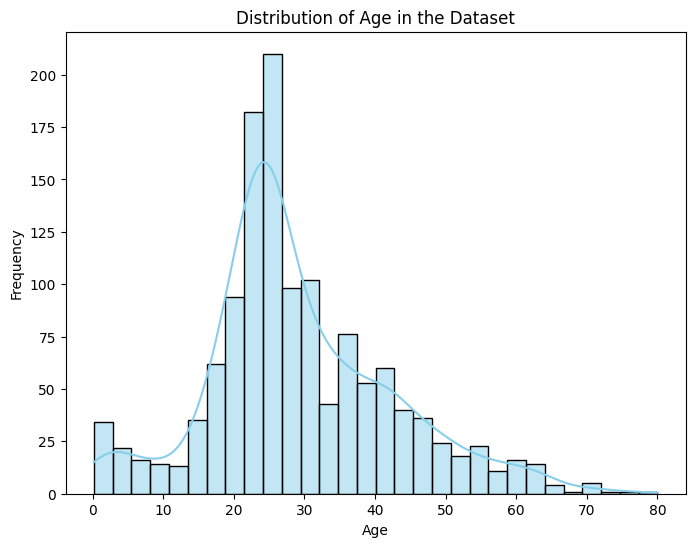

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age in the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

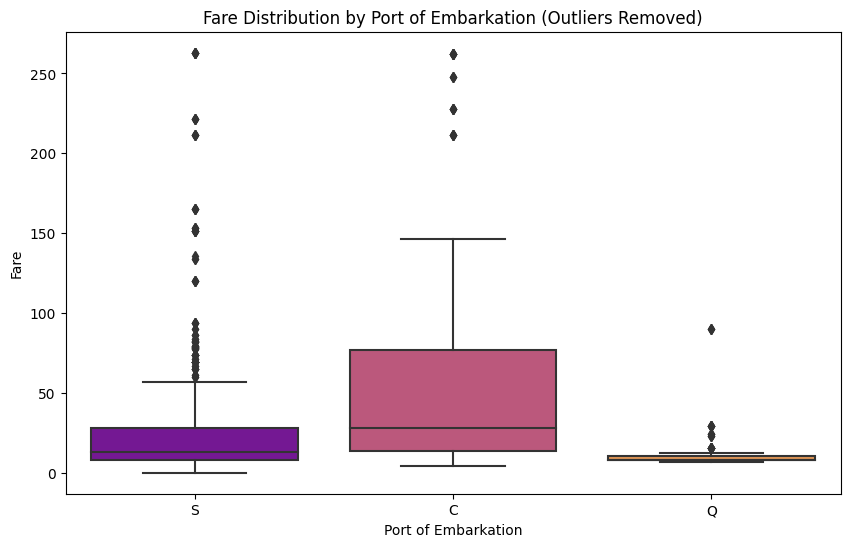

In [ ]:
plt.figure(figsize=(10, 6))

# Set a threshold for outliers
outlier_threshold = 300
sns.boxplot(x='Embarked', y='Fare', data=df[df['Fare'] <= outlier_threshold], palette='plasma')

plt.title('Fare Distribution by Port of Embarkation (Outliers Removed)')
plt.xlabel('Port of Embarkation')
plt.ylabel('Fare')


plt.show()


**"Survivor study according to each category in the data."**

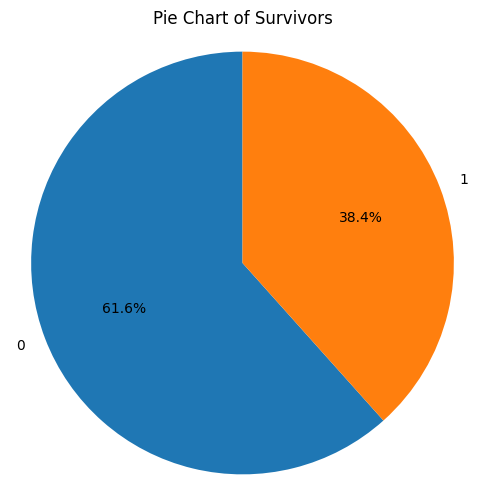

In [ ]:
plt.figure(figsize=(6, 6))
survived_counts = train_df['Survived'].value_counts()
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90 )
plt.axis('equal')
plt.title('Pie Chart of Survivors')
plt.show()


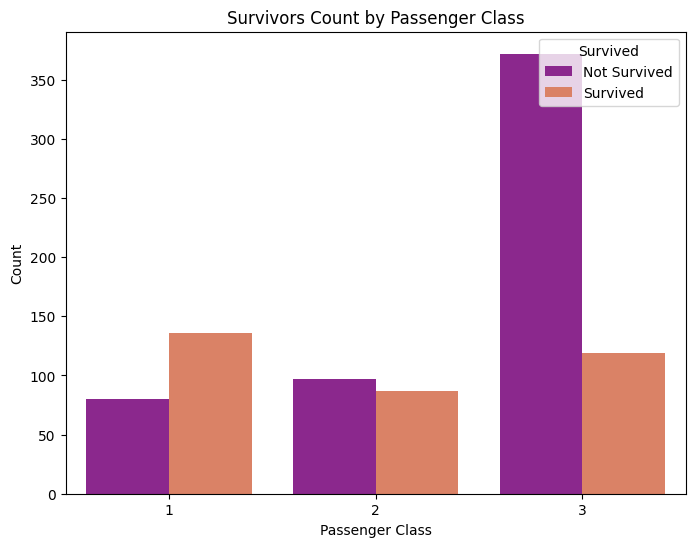

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette='plasma')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survivors Count by Passenger Class')

plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


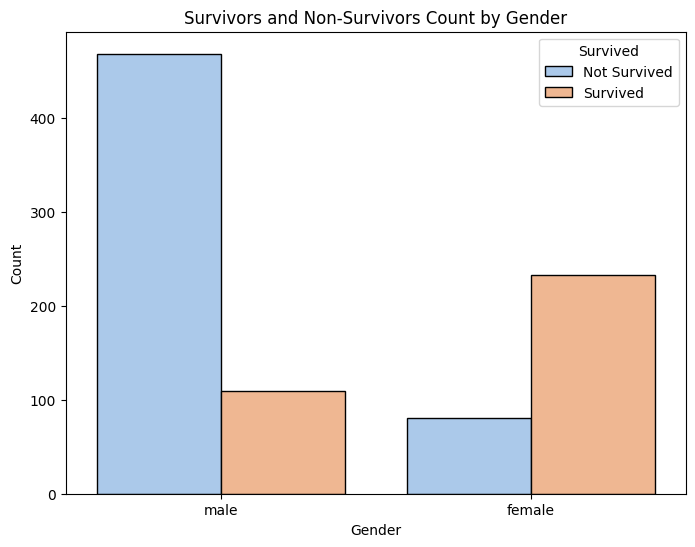

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train_df, palette='pastel', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survivors and Non-Survivors Count by Gender')

plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])

plt.show()


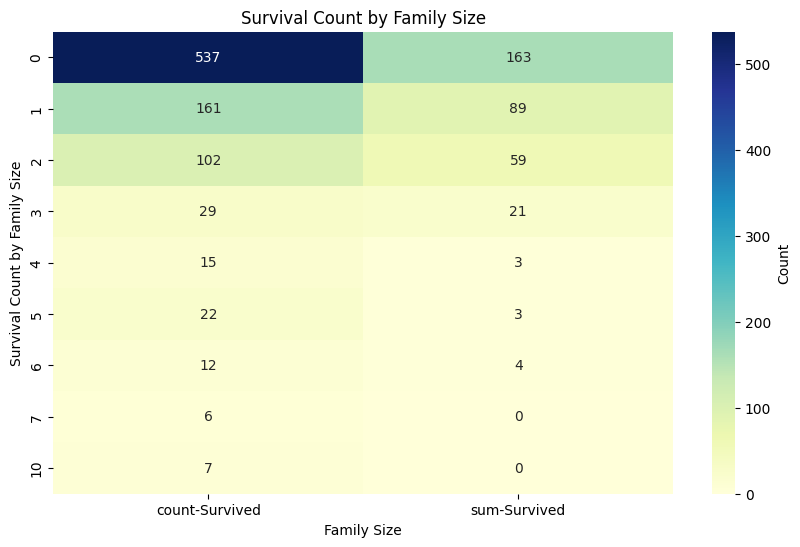

In [ ]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']

pivot_table = train_df.pivot_table(values='Survived', index='FamilySize', aggfunc=['count', 'sum'])

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Count'})

plt.xlabel('Family Size')
plt.ylabel('Survival Count by Family Size')
plt.title('Survival Count by Family Size')
plt.show()


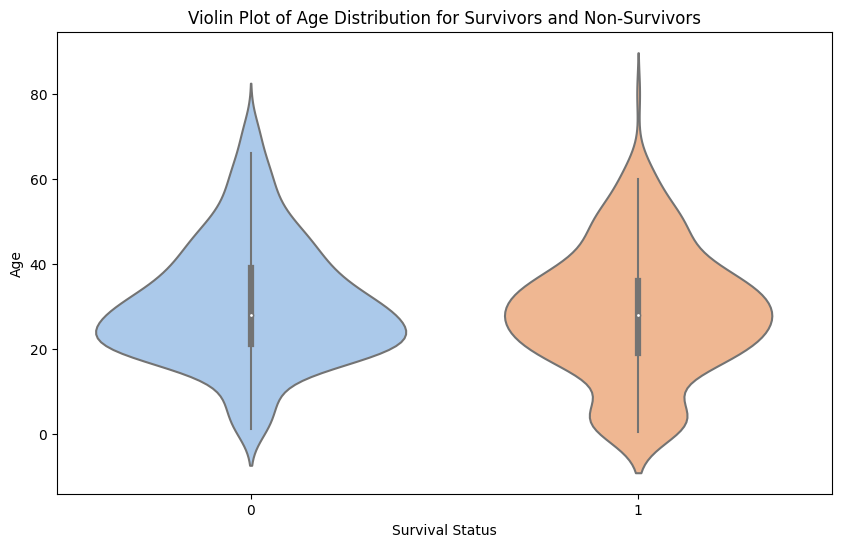

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=train_df, palette='pastel')
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.title('Violin Plot of Age Distribution for Survivors and Non-Survivors')

plt.show()
